# Building Artificial Neural Network

- MNIST Dataset

### Step 1: Import the necessary libraries

In [1]:
# pytorch
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras #francois challot
import matplotlib.pyplot as plt

### Step 2: Load and preprocess the MNIST dataset from mnist.csv

In [3]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',as_frame=True).frame
mnist

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [5]:
# Split the dataset into features (pixels) and labels (target)
features = mnist.drop('class', axis=1)
labels = mnist['class']

In [1]:
# plt.imshow(plt.imread('/content/horse.jfif')/255)

In [7]:
# Normalize pixel values to be in the range [0, 1]
features = features / 255.0
features

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1]:
28*28

784

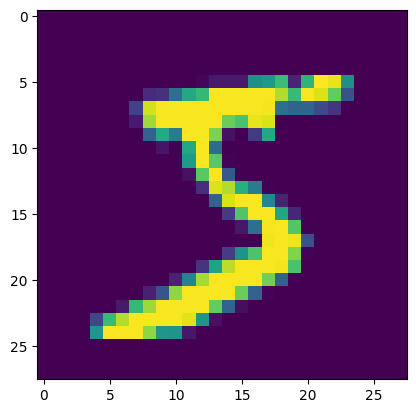

In [8]:
plt.imshow(features.loc[0].values.reshape(28, 28))

In [9]:
# Convert features and labels to NumPy arrays

features = np.array(features)
labels = np.array(labels)

In [10]:
features.shape

(70000, 784)

In [11]:
# Reshape the features to match the expected input shape

features = features.reshape(-1, 28, 28)

In [12]:
# Reshape the labels to be one-dimensional

labels = labels.reshape(-1)
labels

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:

from tensorflow import keras

In [ ]:
nn = keras.models.Sequential(name='My_First_ANN')
nn.add(keras.layers.Dense(50,))

### Step 3: Build the ANN model

In [ ]:
from tensorflow import keras

In [ ]:
from keras.models import Sequential

In [ ]:
nn = Sequential(name='ANN')
nn.add(keras.layers.Flatten(input_shape=(28, 28)))
nn.add(keras.layers.Dense(128, activation='relu', name='layer1'))
nn.add(keras.layers.Dropout(0.2))
nn.add(keras.layers.Dense(128, activation='relu', name='layer2'))
nn.add(keras.layers.Dense(10, activation='softmax',name="output"))
nn.compile(optimizer='adam',loss = keras.losses.categorical_crossentropy,
           metrics=['accuracy'])
nn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "ANN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer1 (Dense)                       │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer2 (Dense)                       │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images to a 1D array
    keras.layers.Dense(128, activation='relu'),   # Fully connected layer with 128 neurons and ReLU activation
    keras.layers.Dropout(0.2),                   # Dropout layer to prevent overfitting
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (for 0-9 digits) and softmax activation
])

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Cross-entropy loss for classification
              metrics=['accuracy'])

### Step 4: Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Cross-entropy loss for classification
              metrics=['accuracy'])

### Step 5: Train the model

In [ ]:
hist = nn.fit(features, labels.astype(int), epochs = 5)  # You can adjust the number of epochs

Epoch 1/5
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9806 - loss: 0.0605
Epoch 2/5
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9817 - loss: 0.0583
Epoch 3/5
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9849 - loss: 0.0452
Epoch 4/5
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9845 - loss: 0.0467
Epoch 5/5
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9854 - loss: 0.0429


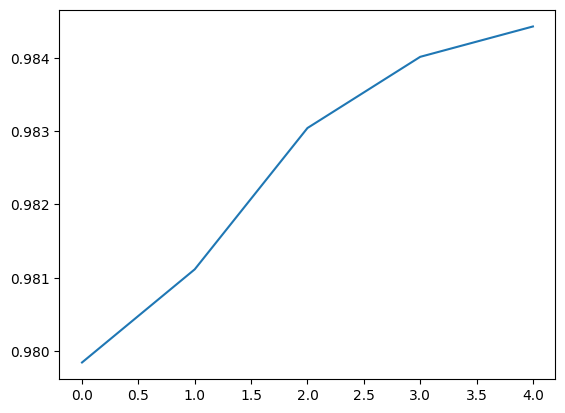

In [ ]:
plt.plot(hist.history['accuracy'])
# plt.plot(hist.history['loss'])

### Step 6: Make predictions

In [ ]:
predictions = nn.predict(features)  # Use the same dataset for predictions (not recommended for real-world use)

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [ ]:
np.argmax(predictions[0])

5

### Step 7: Visualize the results

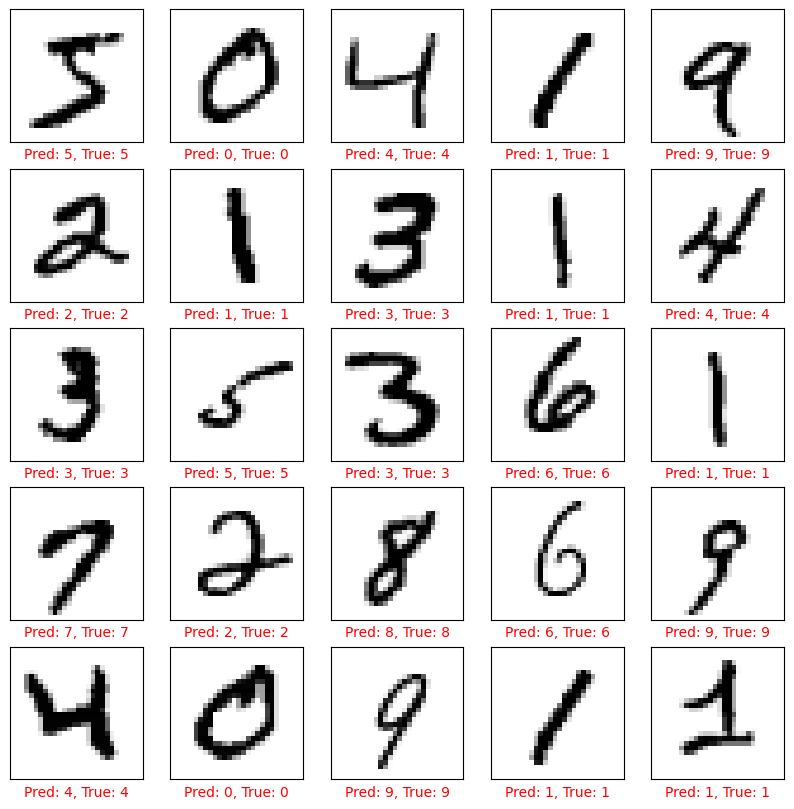

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(features[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"Pred: {predicted_label}, True: {true_label}", color=color)
plt.show()